**Pearson相关系数**（*Pearson Correlation Coefficient*，简称*Pearson系数*）是用于衡量两个变量之间线性相关程度的统计指标。其取值范围为 -1 到 1，具体解释如下：

- **1**：表示完全正相关，说明两个变量同步变化，且呈现强线性关系。
- **0**：表示无显著线性关系，表明两个变量之间没有明显的线性关联。
- **-1**：表示完全负相关，说明两个变量反向变化，且线性关系非常强。

计算*Pearson*系数的公式为：

$$
r = \dfrac{n(\sum xy) - (\sum x)(\sum y)}{\sqrt{\left[n \sum x^2 - (\sum x)^2 \right]\left[n \sum y^2 - (\sum y)^2 \right]}}
$$

其中：
- $n$ 是样本数；
- $x$ 和 $y$ 是两个变量的值；
- $\sum xy$ 是每个样本的 $x$ 和 $y$ 值乘积的总和；
- $\sum x$ 和 $\sum y$ 分别是所有 $x$ 值和所有 $y$ 值的总和。

*Pearson*相关系数适用于衡量连续型变量的线性相关性，假设变量间关系是线性的。如果两者之间存在非线性关系，*Pearson*系数可能无法准确描述它们的关联。

在本次数据分析中，**总分辨率**与**价格**的*Pearson*系数为**0.15**，表明两者间存在一定的正相关关系，但关联强度较弱。这可能意味着，虽然更高的分辨率倾向于出现在更高价位的产品中，但其他因素（如品牌、显示技术、功能）也在影响价格，从而削弱了这一正相关性。

而**屏幕尺寸（英寸）**与**价格**的*Pearson*系数仅为**0.017**，接近于零。这表明屏幕尺寸与价格之间几乎没有线性相关性。其原因可能在于，价格并非仅由屏幕尺寸决定，产品的技术配置、品牌、市场定位等其他因素在价格形成中可能起到更重要的作用。例如，某些高端小屏产品可能因为高分辨率或特殊功能定价较高，而某些大屏产品则可能因为定位低端，价格相对较低。这些因素共同削弱了屏幕尺寸与价格之间的线性关联。此外，数据分布的多样性（如不同价位的同尺寸产品）也可能进一步掩盖了尺寸对价格的直接影响。

In [39]:
# 导入相关的包
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'LXGW Neo ZhiSong'
plt.rcParams['axes.unicode_minus'] = False

In [17]:
# 读取数据
data = pd.read_excel("./data/laptop_price_data.xlsx")
data

,产品名称,屏幕大小_英寸,分辨率,CPU主频,核心数,显卡类型,显存容量,电池类型,续航时间,价格,线程数,电池芯数,电池瓦时
0,【联想昭阳K4e-IAP i5 1235U/16GB/1TB/集显】报价_参数_图片_论坛_...,14.0,1920x1080,1.3,10,显卡类型：集成显卡,共享内存容量,电池类型：锂电池，45瓦时,视具体使用环境而定,5299,12,其他,40-50
1,【神舟战神ZX6-CU5DA】报价_参数_图片_论坛_神舟 战神ZX6-CU5DA笔记本电脑...,15.6,1920x1080,2.9,6,显卡类型：发烧级独立显卡,4GB,电池类型：锂电池,1-5小时,4788,12,其他,其他
2,【联想昭阳K4e-ITL i5 1155G7/8GB/512GB/集显】报价_参数_图片_论...,14.0,1920x1080,2.5,4,显卡类型：集成显卡,共享内存容量,电池类型：锂电池，45瓦时,视具体使用环境而定,4199,8,其他,40-50
3,【神舟战神GX10-CR9Plus】报价_参数_图片_论坛_神舟 GX10-CR9Plus笔...,17.3,1920x1080,3.6,8,显卡类型：发烧级独立显卡,8GB,电池类型：锂电池,视具体使用环境而定,23999,16,其他,其他
4,【ThinkBook 14s 11代酷睿版 i5 1135G7/16GB/1TB/集显】报价...,14.0,1920x1080,2.4,4,显卡类型：集成显卡,共享内存容量,电池类型：锂电池，56瓦时,视具体使用环境而定,5299,8,其他,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,【HUWI Book D15SE 十代酷睿版 i7 10750H/16GB/256GB/集显...,15.6,1920x1080,2.6,6,显卡类型：集成显卡,共享内存容量,电池类型：锂电池，18瓦时,视具体使用环境而定,3348,12,其他,<30
587,【惠普战66 六代 14 锐龙版 R7 7730U/16GB/1TB/集显/高色域】报价_参...,14.0,1920x1080,2.0,8,显卡类型：集成显卡,共享内存容量,电池类型：3芯锂电池，51瓦时,视具体使用环境而定,4399,16,3,50-60
588,【联想昭阳E5-ITL i7 1195G7/16GB/256GB+1TB/MX450】报价_...,15.6,1920x1080,2.9,4,显卡类型：性能级独立显卡,2GB,电池类型：锂电池，45瓦时,视具体使用环境而定,5600,8,其他,40-50
589,【HUWI Book D15SE 十代酷睿版 i7 10750H/20GB/256GB/集显...,15.6,1920x1080,2.6,6,显卡类型：集成显卡,共享内存容量,电池类型：锂电池，18瓦时,视具体使用环境而定,3288,12,其他,<30


In [19]:
# 计算总分辨率
data[['宽度', '高度']] = data['分辨率'].str.split('x', expand=True)

data['总分辨率'] = data['宽度'].astype(int) * data['高度'].astype(int)

data['总分辨率']

0      2073600
1      2073600
2      2073600
3      2073600
4      2073600
        ...   
586    2073600
587    2073600
588    2073600
589    2073600
590    2073600
Name: 总分辨率, Length: 591, dtype: int32

In [20]:
# 按照屏幕分辨率进行排序
data_sorted_by_resolution = data.sort_values(by='总分辨率', ascending=True)
data_sorted_by_resolution

,产品名称,屏幕大小_英寸,分辨率,CPU主频,核心数,显卡类型,显存容量,电池类型,续航时间,价格,线程数,电池芯数,电池瓦时,宽度,高度,总分辨率
568,【台电P13-S01】报价_参数_图片_论坛_台电P13-S01笔记本电脑报价-ZOL中关村在线,13.3,1280x800,1.30,1,显卡类型：集成显卡,共享内存容量,电池类型：6芯锂电池,视具体使用环境而定,2999,1,6,其他,1280,800,1024000
109,【Acer Switch V 10 SW5-017-146Z】报价_参数_图片_论坛_Ac...,10.1,1280x800,1.44,4,显卡类型：集成显卡,共享内存容量,电池类型：2芯锂电池，3770毫安,视具体使用环境而定,3999,4,2,40-50,1280,800,1024000
344,【戴尔Latitude 3300 N006L3300-D1326CN】报价_参数_图片_论...,13.3,1366x768,2.30,2,显卡类型：核芯显卡,共享内存容量,电池类型：3芯锂电池，42瓦时,视具体使用环境而定,3627,4,3,40-50,1366,768,1049088
554,【Acer ES1-533-C4DL】报价_参数_图片_论坛_Acer宏碁 ES1-533笔...,15.6,1366x768,1.10,4,显卡类型：核芯显卡,共享内存容量,电池类型：3芯锂电池，3220毫安,视具体使用环境而定,2799,4,3,30-40,1366,768,1049088
160,【东芝L50-C S02W1】报价_参数_图片_论坛_Toshiba L50-CS02W1东...,15.6,1366x768,2.20,2,显卡类型：入门级独立显卡,2GB,电池类型：4芯锂电池，4500毫安,视具体使用环境而定,4299,4,4,40-50,1366,768,1049088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,【Acer 掠夺者战斧500 i9 11980HK/64GB/2TB/RTX3080】报价_...,17.3,3840x2160,2.60,8,显卡类型：发烧级独立显卡,16GB,电池类型：4芯锂电池,6-10小时,34999,16,4,其他,3840,2160,8294400
536,【ROG 幻15 2020 i7 10875H/16GB/512GB/RTX2060】报价_...,15.6,3840x2160,2.30,8,显卡类型：发烧级独立显卡,6GB,电池类型：4芯锂电池，76瓦时,6-10小时,12999,16,4,70-80,3840,2160,8294400
446,【惠普星 13 2021 i5 1135G7/16GB/512GB/集显/限定版】报价_参数...,13.3,3840x2160,2.40,4,显卡类型：集成显卡,共享内存容量,电池类型：3芯锂电池，43瓦时,11-15小时,5499,8,3,40-50,3840,2160,8294400
169,【玄派玄意星V2 二合一 i5 1135G7/16GB/512GB/集显】报价_参数_图片_...,13.4,3840x2400,2.40,4,显卡类型：集成显卡,共享内存容量,电池类型：锂电池，41.3瓦时,视具体使用环境而定,3999,8,其他,40-50,3840,2400,9216000


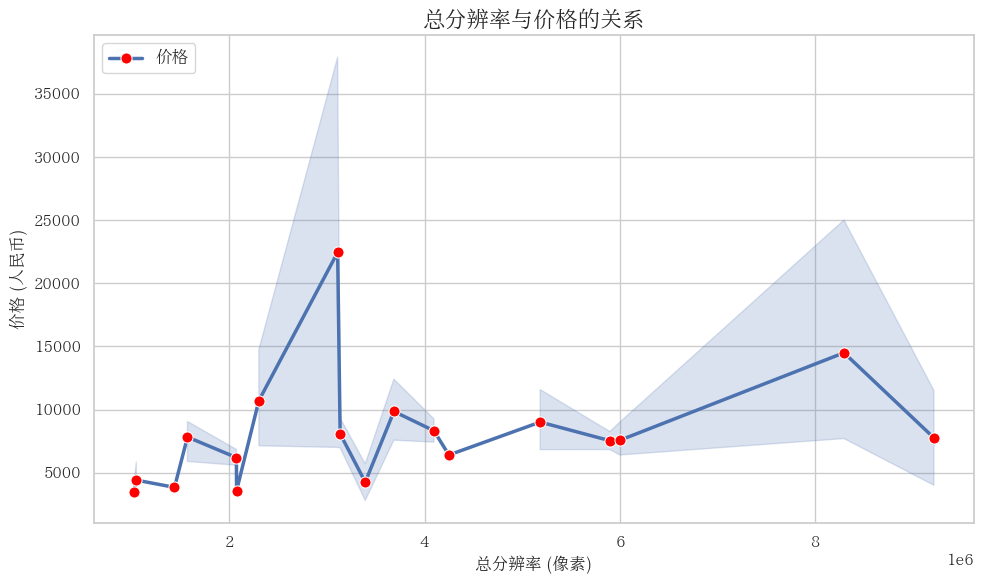

In [31]:
# 绘制总分辨率与价格的折线图
plt.figure(figsize=(10, 6))
sns.lineplot(x='总分辨率',
             y='价格',
             data=data_sorted_by_resolution,
             marker='o',
             color='b',
             markersize=8,
             markerfacecolor='red',
             linewidth=2.5,
             label='价格')

plt.title('总分辨率与价格的关系', fontsize=16)
plt.xlabel('总分辨率 (像素)', fontsize=12)
plt.ylabel('价格 (人民币)', fontsize=12)

plt.legend(loc='upper left', fontsize=12)

plt.tight_layout()

plt.savefig('./figure/resolution_vs_price.png', dpi=1500, bbox_inches='tight')

In [33]:
# 计算总分辨率与价格的 pearson 系数
p_resolution_vs_price = data_sorted_by_resolution["总分辨率"].corr(
    data_sorted_by_resolution["价格"], method="pearson")

p_resolution_vs_price

0.15352925750661633

In [34]:
# 按照屏幕分辨率进行排序
data_sorted_by_size = data.sort_values(by="屏幕大小_英寸", ascending=True)
data_sorted_by_size

,产品名称,屏幕大小_英寸,分辨率,CPU主频,核心数,显卡类型,显存容量,电池类型,续航时间,价格,线程数,电池芯数,电池瓦时,宽度,高度,总分辨率
40,【壹号本ONEMIX 3 PRO铂金版】报价_参数_图片_论坛_ONE-NETBOOK On...,8.4,2560x1600,1.2,4,显卡类型：集成显卡,共享内存容量,电池类型：锂电池，8600毫安,6-10小时,8099,8,其他,>90,2560,1600,4096000
53,【壹号本3S 2021 m3 8100Y/8GB/256GB/集显】报价_参数_图片_论坛_...,8.4,2560x1600,1.1,2,显卡类型：集成显卡,共享内存容量,电池类型：锂电池，8600毫安,视具体使用环境而定,4999,4,其他,>90,2560,1600,4096000
398,【壹号本ONEMIX 3S+】报价_参数_图片_论坛_ONE-NETBOOK 壹号本第三代S...,8.4,2560x1600,1.1,2,显卡类型：集成显卡,共享内存容量,电池类型：锂电池，8600毫安,视具体使用环境而定,4999,4,其他,>90,2560,1600,4096000
299,【壹号本ONEMIX 3 Pro】报价_参数_图片_论坛_ONE-NETBOOK OneMi...,8.4,2560x1440,1.0,4,显卡类型：集成显卡,共享内存容量,电池类型：锂电池，8600毫安,视具体使用环境而定,6699,8,其他,>90,2560,1440,3686400
52,【壹号本ONEMIX 3s喵星限量版】报价_参数_图片_论坛_ONE-NETBOOK One...,8.4,2560x1600,1.0,2,显卡类型：集成显卡,共享内存容量,电池类型：锂电池，8600毫安,6-10小时,5099,4,其他,>90,2560,1600,4096000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,【机械革命蛟龙760-P R7 4800H/16GB/512GB/RTX2060】报价_参数...,17.3,1920x1080,2.9,8,显卡类型：发烧级独立显卡,6GB,电池类型：3芯锂电池，46.74瓦时,1-5小时,7199,16,3,40-50,1920,1080,2073600
242,【ROG 魔霸5R Plus R9 5900HX/16GB/1TB/RX6800M】报价_参...,17.3,2560x1440,3.3,8,显卡类型：发烧级独立显卡,12GB,电池类型：4芯锂电池，90瓦时,1-5小时,14999,16,4,>90,2560,1440,3686400
247,【神舟战神GX8-CR5S1】报价_参数_图片_论坛_神舟 GX8-CR5S1笔记本电脑报价...,17.3,1920x1080,2.8,6,显卡类型：发烧级独立显卡,6GB,电池类型：锂电池,1-5小时,7299,6,其他,其他,1920,1080,2073600
276,【火影T9M i7 10750H/16GB/512GB/RTX2070/144Hz】报价_参...,17.3,1920x1080,2.6,6,显卡类型：发烧级独立显卡,8GB,电池类型：6芯锂电池，4730毫安,视具体使用环境而定,8799,12,6,50-60,1920,1080,2073600


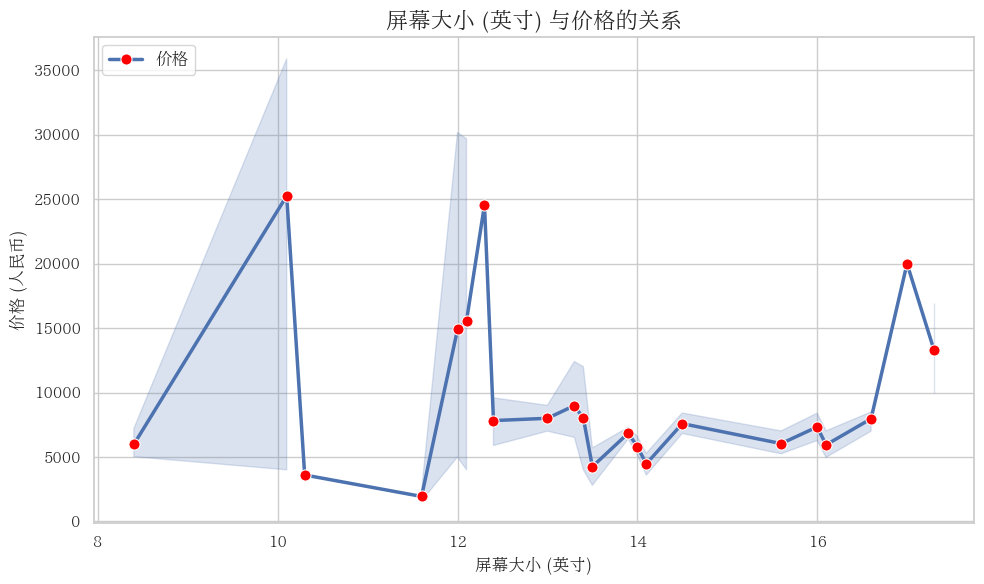

In [36]:
# 绘制屏幕大小 (英寸) 与价格的折线图
plt.figure(figsize=(10, 6))
sns.lineplot(x='屏幕大小_英寸',
             y='价格',
             data=data_sorted_by_resolution,
             marker='o',
             color='b',
             markersize=8,
             markerfacecolor='red',
             linewidth=2.5,
             label='价格')

plt.title('屏幕大小 (英寸) 与价格的关系', fontsize=16)
plt.xlabel('屏幕大小 (英寸)', fontsize=12)
plt.ylabel('价格 (人民币)', fontsize=12)

plt.legend(loc='upper left', fontsize=12)

plt.tight_layout()

plt.savefig('./figure/size_vs_price.png', dpi=1500, bbox_inches='tight')

In [38]:
# 计算屏幕大小 (英寸) 与价格的 pearson 系数
p_size_vs_price = data_sorted_by_size["屏幕大小_英寸"].corr(
    data_sorted_by_size["价格"], method="pearson")

p_size_vs_price

0.017105607831433303